# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [2]:
file_path = 'spotify_data/streaminghistory0.csv'
df_spotify_0 = pd.read_csv(file_path, header=0)
print(df_spotify_0)

                endTime            artistName  \
0      2022-12-03 02:02  Cigarettes After Sex   
1      2022-12-03 02:02         Leonard Cohen   
2      2022-12-06 21:05          Vlad Holiday   
3      2022-12-06 21:05                 Lorde   
4      2022-12-06 21:05         Ariana Grande   
...                 ...                   ...   
11954  2023-01-02 20:59     Kaizers Orchestra   
11955  2023-01-02 20:59              Mr.Kitty   
11956  2023-01-02 20:59          daddy's girl   
11957  2023-01-02 20:59          daddy's girl   
11958  2023-01-02 20:59          daddy's girl   

                             trackName  msPlayed  
0                                Truly   30000.0  
1      Take This Waltz - Paris Version    8210.0  
2                     So Damn Into You   37895.0  
3                                 Team    8984.0  
4                             Into You    1221.0  
...                                ...       ...  
11954                      Resistansen     208.0  
119

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [3]:
help(df_spotify_0.tail)
help(df_spotify_0.head)

Help on method tail in module pandas.core.generic:

tail(n: 'int' = 5) -> 'Self' method of pandas.core.frame.DataFrame instance
    Return the last `n` rows.

    This function returns last `n` rows from the object based on
    position. It is useful for quickly verifying data, for example,
    after sorting or appending rows.

    For negative values of `n`, this function returns all rows except
    the first `|n|` rows, equivalent to ``df[|n|:]``.

    If n is larger than the number of rows, this function returns all rows.

    Parameters
    ----------
    n : int, default 5
        Number of rows to select.

    Returns
    -------
    type of caller
        The last `n` rows of the caller object.

    See Also
    --------
    DataFrame.head : The first `n` rows of the caller object.

    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [4]:
df_spotify_0.head(5) # automatically set to five 
df_spotify_0.tail(10)

,endTime,artistName,trackName,msPlayed
11949,2023-01-02 20:58,Ariana Grande,six thirty,1699.0
11950,2023-01-02 20:58,Leonard Cohen,Thanks for the Dance,19483.0
11951,2023-01-02 20:59,Des Rocs,Used to the Darkness,185.0
11952,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,603.0
11953,2023-01-02 20:59,Caroline Polachek,Hit Me Where It Hurts,208.0
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [5]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])
print(df_spotify_0)


                  endTime            artistName  \
0     2022-12-03 02:02:00  Cigarettes After Sex   
1     2022-12-03 02:02:00         Leonard Cohen   
2     2022-12-06 21:05:00          Vlad Holiday   
3     2022-12-06 21:05:00                 Lorde   
4     2022-12-06 21:05:00         Ariana Grande   
...                   ...                   ...   
11954 2023-01-02 20:59:00     Kaizers Orchestra   
11955 2023-01-02 20:59:00              Mr.Kitty   
11956 2023-01-02 20:59:00          daddy's girl   
11957 2023-01-02 20:59:00          daddy's girl   
11958 2023-01-02 20:59:00          daddy's girl   

                             trackName  msPlayed  
0                                Truly   30000.0  
1      Take This Waltz - Paris Version    8210.0  
2                     So Damn Into You   37895.0  
3                                 Team    8984.0  
4                             Into You    1221.0  
...                                ...       ...  
11954                      Res

#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [6]:
number_of_unique_artists = df_spotify_0['artistName'].nunique()
print(number_of_unique_artists)

495


#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [7]:
number_of_unique_songs = df_spotify_0['trackName'].nunique()
print(number_of_unique_songs)

1308


### Part 1: Questions
Q1: Which columns are in the dataset?
The columns in the dataset are 'endTime', 'artistName', 'trackName' and 'msPlayed'.

Q2: What timeframe does the dataset span?
The timeframe spans from 3th of december 2022 until 1th feburary 2023.

Q3: How many unique artists are in the dataset?
There are 495 unique artists in the dataset.

Q4: How many unique songs are in the dataset?
There are 1308 unique songs in the dataset.

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [8]:
path_folder = 'spotify_data'
list_of_files = os.listdir(path_folder)
df1 = []
for file in list_of_files: 
    df = pd.read_csv(path_folder + '/' + file)
    df1.append(df)
merged_df = pd.concat(df1)
print(merged_df)



                endTime                    artistName  \
0      2023-08-11 09:14                    Yumi Zouma   
1      2023-08-11 09:14                         BØRNS   
2      2023-08-11 09:14                      Gorillaz   
3      2023-08-11 09:14                   Mötley Crüe   
4      2023-08-11 09:14                        Pixies   
...                 ...                           ...   
11954  2023-08-11 08:46               Tears For Fears   
11955  2023-08-11 08:47                       TV Girl   
11956  2023-08-11 08:47                 Ariana Grande   
11957  2023-08-11 09:11                 Ariana Grande   
11958  2023-08-11 09:11  Creedence Clearwater Revival   

                                trackName  msPlayed [ZoneTransfer]  
0                               Yesterday    1770.0            NaN  
1                    10,000 Emerald Pools    4160.0            NaN  
2      She's My Collar (feat. Kali Uchis)     810.0            NaN  
3                            Dr. Feelgo

#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [10]:
merged_df['endTime'] = pd.to_datetime(merged_df['endTime'])
merged_df.sort_values(by='endTime')



,endTime,artistName,trackName,msPlayed,[ZoneTransfer]
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30000.0,NaN
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8210.0,NaN
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37895.0,NaN
3,2022-12-06 21:05:00,Lorde,Team,8984.0,NaN
4,2022-12-06 21:05:00,Ariana Grande,Into You,1221.0,NaN
...,...,...,...,...,...
9062,NaT,The Lumineers,Ophelia,371.0,NaN
0,NaT,NaN,NaN,NaN,ZoneId=3
1,NaT,NaN,NaN,NaN,ReferrerUrl=C:\Users\holml\Downloads\CA1_assig...
0,NaT,NaN,NaN,NaN,ZoneId=3


In [12]:
merged_df = merged_df.drop(columns=['[ZoneTransfer]'])
merged_df.head()

,endTime,artistName,trackName,msPlayed
0,2023-08-11 09:14:00,Yumi Zouma,Yesterday,1770.0
1,2023-08-11 09:14:00,BØRNS,"10,000 Emerald Pools",4160.0
2,2023-08-11 09:14:00,Gorillaz,She's My Collar (feat. Kali Uchis),810.0
3,2023-08-11 09:14:00,Mötley Crüe,Dr. Feelgood,1706.0
4,2023-08-11 09:14:00,Pixies,Here Comes Your Man,14191.0


#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [13]:
only_2023_df = merged_df[merged_df['endTime'].dt.year == 2023]
print(only_2023_df.shape)

(156557, 4)


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [14]:
cleaned_df = only_2023_df.dropna()
print(cleaned_df.shape)

(156539, 4)


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [15]:
cleaned_df['secPlayed'] = cleaned_df['msPlayed'] / 1000 
cleaned_df = cleaned_df.drop(columns=['msPlayed'])
print(cleaned_df.head())


              endTime   artistName                           trackName  \
0 2023-08-11 09:14:00   Yumi Zouma                           Yesterday   
1 2023-08-11 09:14:00        BØRNS                10,000 Emerald Pools   
2 2023-08-11 09:14:00     Gorillaz  She's My Collar (feat. Kali Uchis)   
3 2023-08-11 09:14:00  Mötley Crüe                        Dr. Feelgood   
4 2023-08-11 09:14:00       Pixies                 Here Comes Your Man   

   secPlayed  
0      1.770  
1      4.160  
2      0.810  
3      1.706  
4     14.191  


/tmp/ipykernel_450139/2136612342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['secPlayed'] = cleaned_df['msPlayed'] / 1000


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

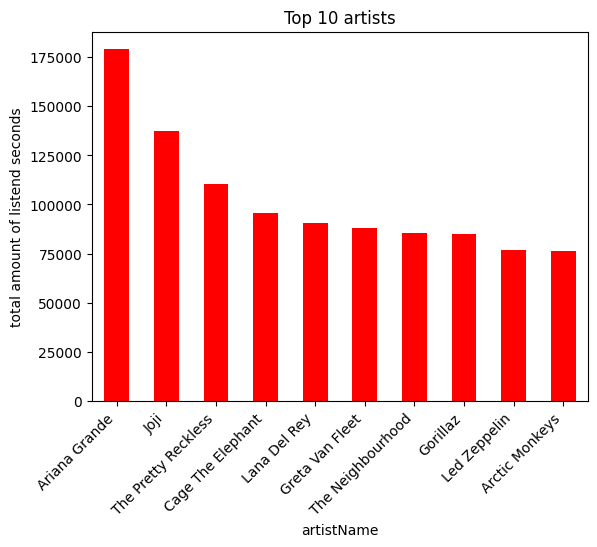

In [16]:
artists_by_total_seconds = cleaned_df.groupby('artistName')['secPlayed'].sum()
top_ten_artists = artists_by_total_seconds.nlargest(10)
top_ten_artists.plot(kind='bar', color='red')
plt.xlabel('artistName')
plt.ylabel('total amount of listend seconds')
plt.title('Top 10 artists')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

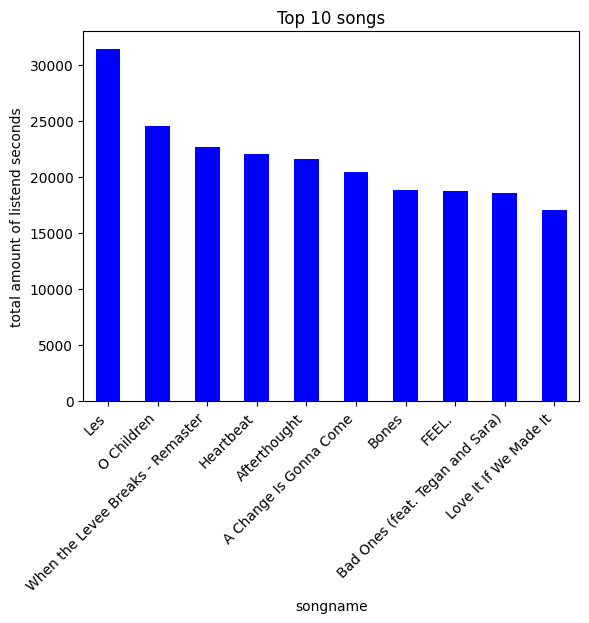

In [ ]:
artists_by_total_seconds = cleaned_df.groupby('trackName')['secPlayed'].sum()
top_ten_artists = artists_by_total_seconds.nlargest(10)
top_ten_artists.plot(kind='bar', color='blue')
plt.xlabel('songname')
plt.ylabel('total amount of listend seconds')
plt.title('Top 10 songs')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

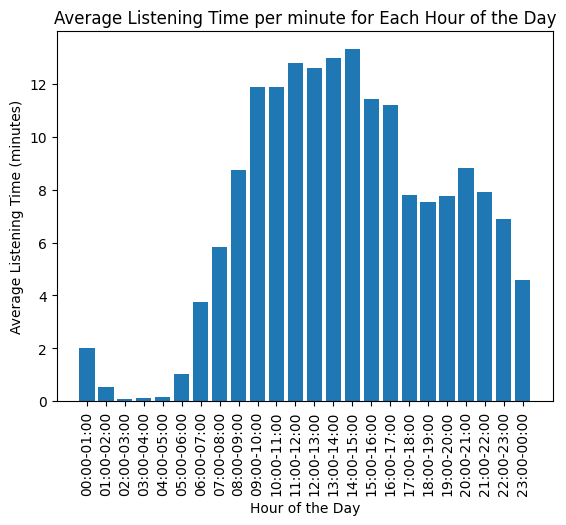

In [ ]:
cleaned_df['hour'] = cleaned_df['endTime'].dt.hour
group_hours = (cleaned_df.groupby('hour')['secPlayed'].sum()) / 60 / 365

plt.bar(group_hours.index, group_hours.values)
plt.title('Average Listening Time per minute for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Listening Time (minutes)')
hour_ranges = [f"{hour:02d}:00-{(hour + 1) % 24:02d}:00" for hour in range(24)]
plt.xticks(range(24), labels=hour_ranges, rotation= 'vertical')
plt.show()


In [22]:
#Count Rage Against the Machine in the artistName column
cleaned_df['artistName'].value_counts()['Rage Against The Machine']

189

KeyError: 'Rage Against the Machine'

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

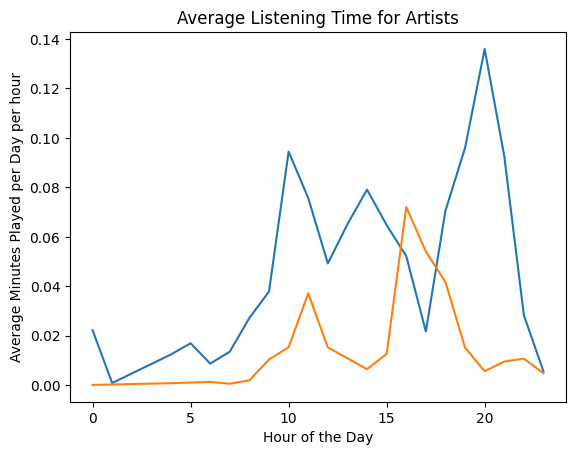

In [ ]:
Cohen_hours = cleaned_df[cleaned_df['artistName'] == 'Leonard Cohen'].groupby('hour')['secPlayed'].sum() / 60 / 365
Rage_hours = cleaned_df[cleaned_df['artistName'] == 'Rage Against The Machine'].groupby('hour')['secPlayed'].sum() / 60 / 365

plt.plot(Cohen_hours.index, Cohen_hours.values, label='Leonard Cohen')
plt.plot(Rage_hours.index, Rage_hours.values, label='Rage Against the Machine') 

plt.xlabel('Hour of the Day')
plt.ylabel('Average Minutes Played per Day per hour')
plt.title('Average Listening Time for Artists')
plt.show()



#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [ ]:
cleaned_df['skipped'] = (cleaned_df['secPlayed'] < 30)
cleaned_df['skipped'] = cleaned_df['skipped'].astype(int)
cleaned_df.head(10)

,endTime,artistName,trackName,secPlayed,hour,skipped
0,2023-07-05 16:31:00,Rush,Tom Sawyer,2.066,16,1
1,2023-07-05 16:31:00,Tom Petty,Free Fallin',8.195,16,1
2,2023-07-05 16:31:00,2Pac,Young Niggaz,19.806,16,1
3,2023-07-05 16:31:00,2Pac,Young Niggaz,0.882,16,1
4,2023-07-05 16:31:00,Sleeping With Sirens,Better Off Dead,4.481,16,1
5,2023-07-05 16:31:00,Ariana Grande,ghostin,16.487,16,1
6,2023-07-05 16:32:00,Wu-Tang Clan,"Bring Da Ruckus (feat. RZA, Ghostface Killah, ...",23.962,16,1
7,2023-07-05 16:32:00,2Pac,Young Niggaz,0.557,16,1
8,2023-07-05 16:32:00,Lana Del Rey,Young And Beautiful,0.208,16,1
9,2023-07-05 16:32:00,Leonard Cohen,Take This Waltz - Paris Version,50.828,16,0


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

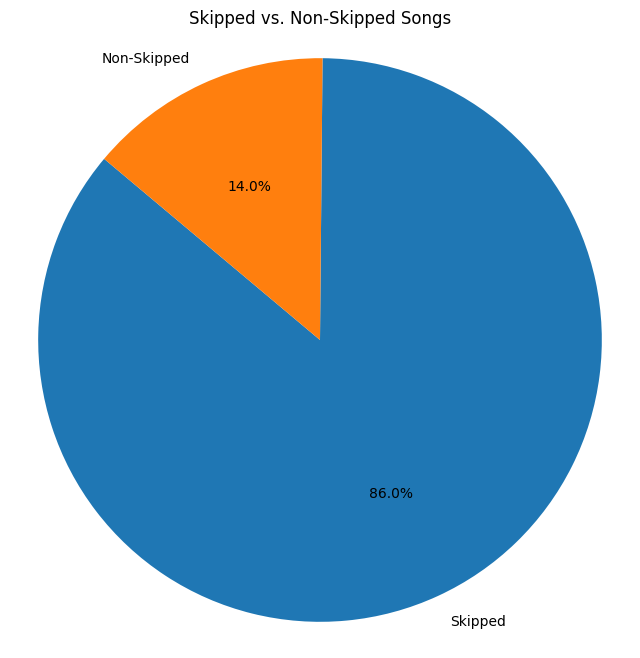

In [ ]:
skipped_counts = cleaned_df['skipped'].value_counts()
labels = ['Skipped', 'Non-Skipped']
plt.figure(figsize=(8, 8))
plt.pie(skipped_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Skipped vs. Non-Skipped Songs')
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [ ]:
df_skipped = cleaned_df.groupby('artistName')['skipped'].mean().reset_index()
df_skipped.columns = ['artistName', 'SkipRate']
df_skipped.head(10)

,artistName,SkipRate
0,10cc,0.678571
1,2Pac,0.861598
2,3 Doors Down,0.500000
3,4 Non Blondes,0.721311
4,50 Cent,0.678571
5,88rising,0.700375
6,A Day To Remember,0.684211
7,A Problem Squared,1.000000
8,A R I Z O N A,0.800000
9,A Tribe Called Quest,0.792271


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [ ]:
most_skipped = df_skipped.nlargest(3, 'SkipRate')
least_skipped = df_skipped.nsmallest(3, 'SkipRate')
print(most_skipped)
print(least_skipped)

           artistName  SkipRate
7   A Problem Squared       1.0
16         Acid Ghost       1.0
25  Albert Hammond Jr       1.0
        artistName  SkipRate
305  Gloria Gaynor  0.000000
645       Roc Boyz  0.111111
437          LACES  0.142857


## Part 4: God Is a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [ ]:
df_ariana = cleaned_df[cleaned_df['artistName'] == 'Ariana Grande'].copy()
df_ariana.head(10)

,endTime,artistName,trackName,secPlayed,hour,skipped
5,2023-07-05 16:31:00,Ariana Grande,ghostin,16.487,16,1
21,2023-07-05 16:39:00,Ariana Grande,34+35,27.438,16,1
27,2023-07-05 16:48:00,Ariana Grande,Baby I,7.536,16,1
29,2023-07-05 16:52:00,Ariana Grande,34+35,12.585,16,1
49,2023-07-05 16:54:00,Ariana Grande,ghostin,24.501,16,1
57,2023-07-05 16:55:00,Ariana Grande,Break Your Heart Right Back,9.840,16,1
67,2023-07-05 21:24:00,Ariana Grande,Just Look Up (From Don’t Look Up),22.302,21,1
80,2023-07-05 21:27:00,Ariana Grande,Just A Little Bit Of Your Heart,0.069,21,1
82,2023-07-05 21:27:00,Ariana Grande,One Last Time,0.023,21,1
89,2023-07-05 21:27:00,Ariana Grande,MONOPOLY (with Victoria Monét),0.208,21,1


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

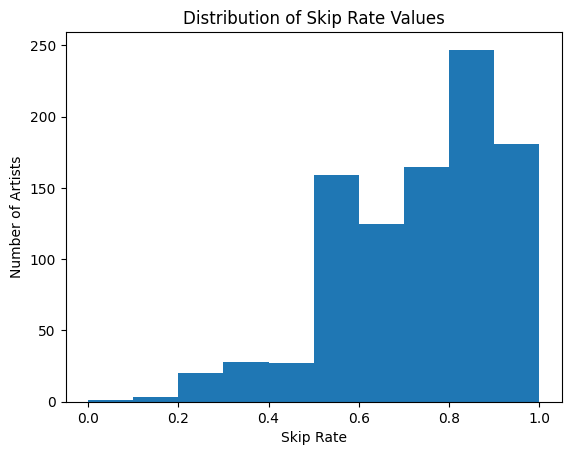

Ariana Grande's skip rate: 0.9952939959662822


In [ ]:
plt.hist(df_skipped['SkipRate'])
plt.xlabel('Skip Rate')
plt.ylabel('Number of Artists')
plt.title('Distribution of Skip Rate Values')
plt.show()

ariana_skip_rate = df_skipped[df_skipped['artistName'] == 'Ariana Grande']['SkipRate'].values[0]
print("Ariana Grande's skip rate:", ariana_skip_rate)

### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \
Yes you skipped a lot of Ariana Grande´s songs compared to the rest of the dataset as seen in the graf above. 

Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?
A reason for Ariana Grande to be your number 1 artist is that you have pressed played many times and then figured out before 30 seconds that the songs were not that great after all. However, in 0.5% of the cases you thought the songs were relative good and let them play for longer. 